In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [10]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
#No use of salary and sl_no so removing it.
dataset.drop(['salary','sl_no'], axis=1, inplace=True)
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# To check for null values


<AxesSubplot: >

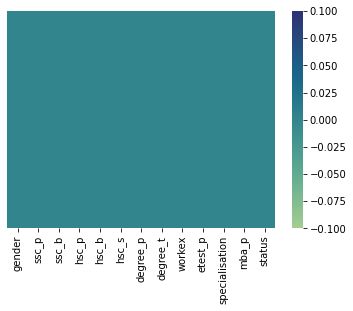

In [12]:
 sns.heatmap(dataset.isnull(),yticklabels=False,cmap='crest')

In [13]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [14]:
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)

In [15]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,0,1,0,1,0,0


In [16]:

dataset.rename(columns={"Others": "Other_Degree"},inplace=True)


In [18]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,0,1,0,1,0,0


<AxesSubplot: xlabel='hsc_b', ylabel='count'>

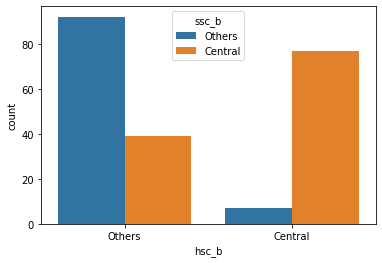

In [19]:
sns.countplot(x='hsc_b',data=dataset,hue='ssc_b')

In [20]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])

In [21]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [22]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outliers

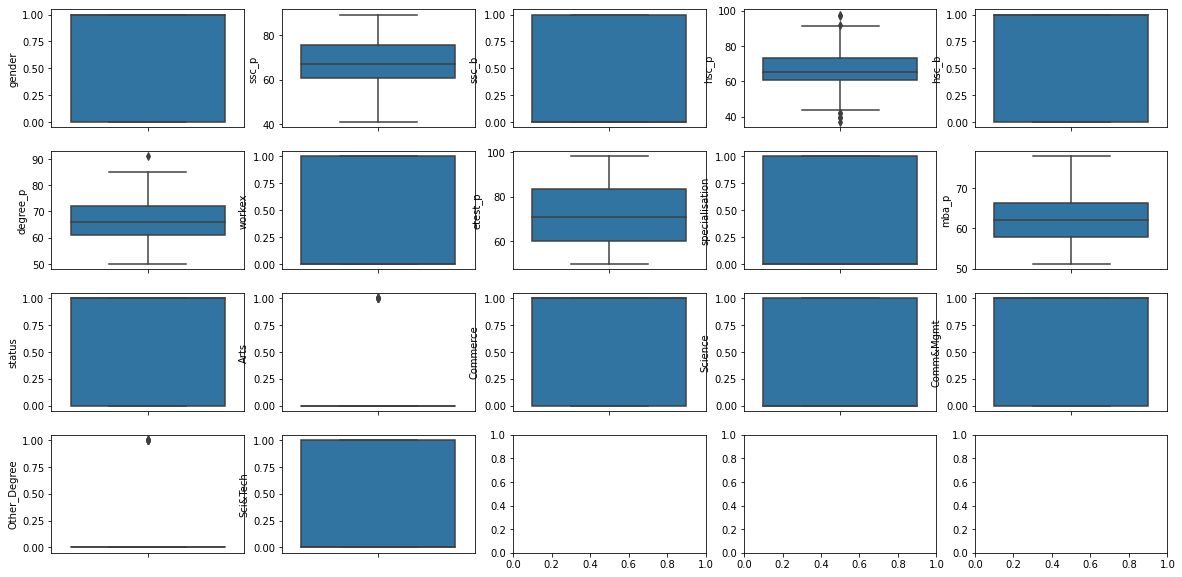

In [23]:
fig, axs = plt.subplots(ncols=5,nrows=4,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1


In [26]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

<AxesSubplot: >

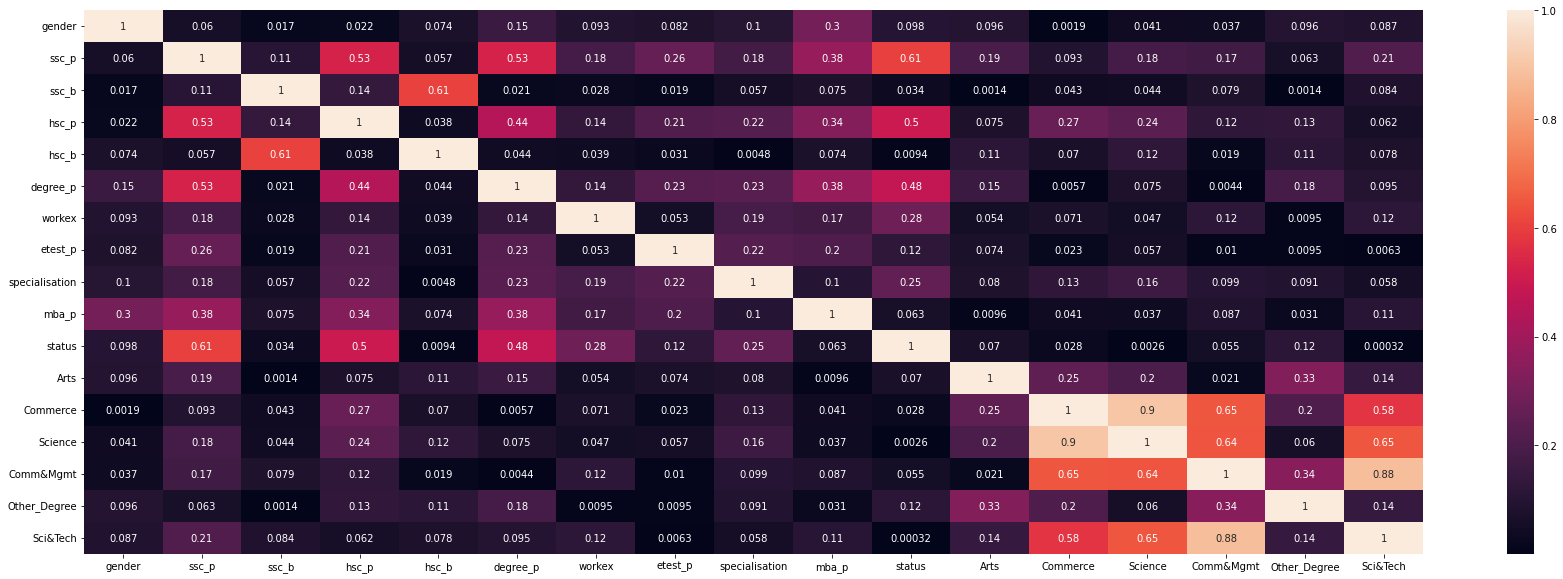

In [29]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(30,10))
sns.heatmap(dataset.corr().abs(), annot=True)

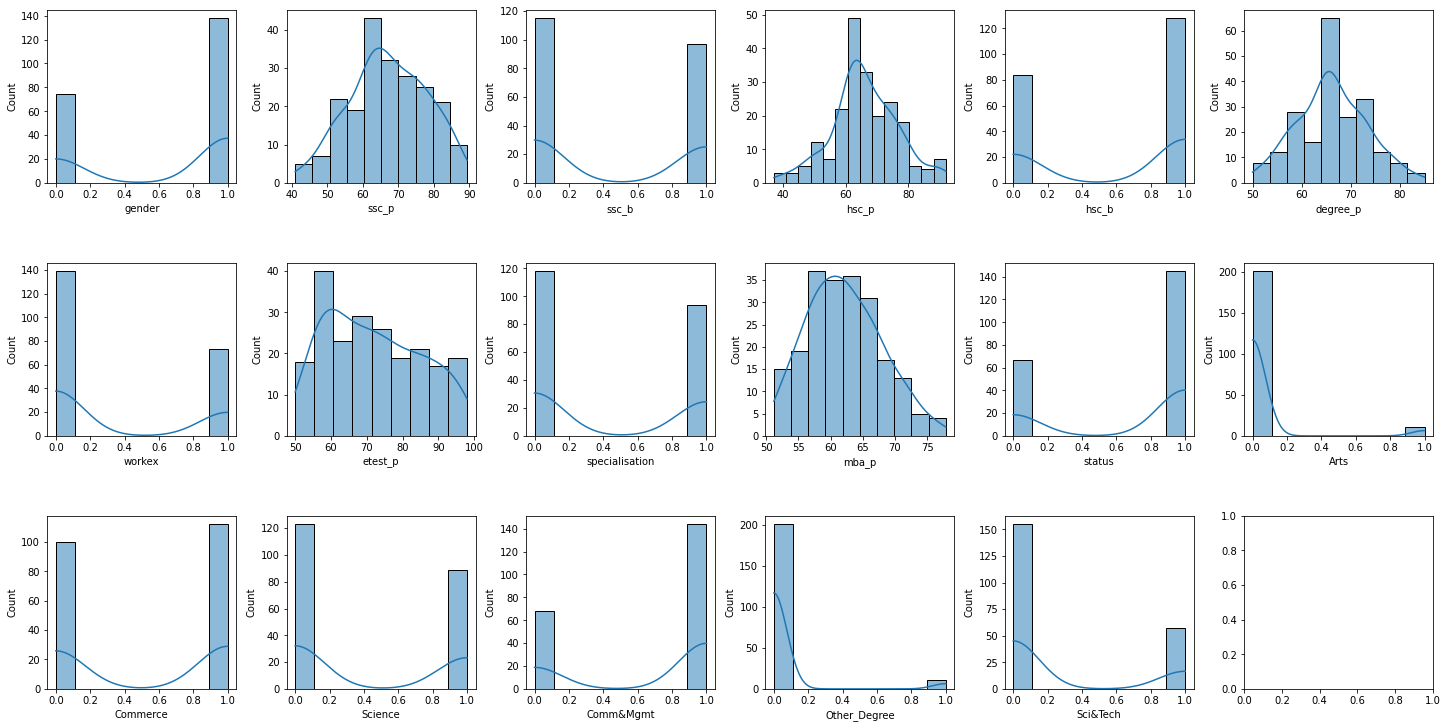

In [39]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.histplot(v, ax=axs[index],kde=True)
    index+=1
    
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [40]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
y = dataset.loc[:, 'status'] # label is status of placement

In [41]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [42]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 212, dtype: int32

# Logistic Regression


In [43]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) 
x_scaled = pd.DataFrame(x_scaled)

In [44]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

In [45]:
lr = LogisticRegression()

In [48]:
lr.fit(x_train, y_train)


LogisticRegression()

In [51]:
y_pred = lr.predict(x_test)

In [53]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [54]:
y_test

209    1
38     1
90     1
192    1
150    1
76     1
97     0
138    1
5      0
84     1
56     1
144    0
159    0
113    1
75     0
203    1
127    1
12     0
169    0
157    1
167    0
201    0
211    1
189    0
184    0
18     0
214    0
15     1
87     0
72     1
7      1
64     1
142    1
98     1
137    1
161    0
34     0
153    1
91     0
Name: status, dtype: int32

In [59]:
accuracy_score(y_test, y_pred)

0.8717948717948718

In [60]:
lr.score(x_train,y_train)

0.9132947976878613

In [57]:
confusion_matrix(y_test, y_pred)

array([[14,  3],
       [ 2, 20]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.87      0.91      0.89        22

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



# We conclude that Logistic Regression works better with better accuracy but difference in scores is highest among three !!